In [1]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
import tensorflow as tf
from tensorflow import keras
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load features and labels data

with open('aapl_one_gram_features_labelled_df.pkl', 'rb') as f:
    labelled_aapl_news_df = pickle.load(f)

In [3]:
trainX_df=labelled_aapl_news_df['features']
trainY_df=labelled_aapl_news_df['label']

trainX = np.stack(trainX_df)

trainY_df=trainY_df.astype('int')
trainY = np.stack(trainY_df)

print(trainX.shape)
print(trainY.shape)
trainX

(71941, 703)
(71941,)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
pca = PCA(n_components=700)
pComponents= pca.fit_transform(trainX)
print(pca.explained_variance_ratio_)
sum([float(x) for x in pca.explained_variance_ratio_])

[1.32883149e-01 4.76277059e-02 3.56595545e-02 1.37901741e-02
 1.26224418e-02 1.16200153e-02 1.01264151e-02 8.84582334e-03
 7.55819198e-03 7.21041341e-03 6.55083533e-03 6.28343963e-03
 6.14180823e-03 5.66837850e-03 5.47585998e-03 5.46703399e-03
 5.25813918e-03 5.14525058e-03 4.97566944e-03 4.82511421e-03
 4.61329874e-03 4.41802003e-03 4.33032974e-03 4.29975905e-03
 4.25620414e-03 4.06891867e-03 3.97695105e-03 3.90163312e-03
 3.78934415e-03 3.74945898e-03 3.69668562e-03 3.55820326e-03
 3.54142299e-03 3.47046483e-03 3.41181703e-03 3.38786904e-03
 3.36945859e-03 3.31598042e-03 3.28892294e-03 3.23908206e-03
 3.17427293e-03 3.13471042e-03 3.07792503e-03 3.05986296e-03
 3.02168581e-03 2.98689785e-03 2.92824811e-03 2.90905206e-03
 2.85296888e-03 2.84539159e-03 2.79824560e-03 2.77776408e-03
 2.73743030e-03 2.73519789e-03 2.70682109e-03 2.69788459e-03
 2.64848034e-03 2.63115453e-03 2.61358154e-03 2.59924350e-03
 2.58189850e-03 2.55179837e-03 2.52456571e-03 2.50651470e-03
 2.49861221e-03 2.483343

0.9997710586714115

In [5]:
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.2, random_state=23)

In [6]:
print(X_train.shape)
print(y_train.shape)

(57552, 703)
(57552,)


In [7]:
print("training Logistic Regression now ...")

logistic_regression = LogisticRegression(max_iter=1000, verbose=15, n_jobs=-1).fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression classifier is: %f ' % acc)

training Logistic Regression now ...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.9s finished


Accuracy of Logistic Regression classifier is: 0.571409 


In [8]:
print("training Random Forest classifier now ...")

random_forest_classifier = RandomForestClassifier(n_estimators=1000, verbose=15, n_jobs=-1).fit(X_train,y_train)
#increase n_estimators if you face issues in training
y_pred=random_forest_classifier.predict(X_test)
acc=accuracy_score(y_test,y_pred)
print('Accuracy of Random Forest classifier is: %f ' % acc)

training Random Forest classifier now ...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 1000building tree 2 of 1000

building tree 3 of 1000
building tree 4 of 1000building tree 5 of 1000

building tree 6 of 1000
building tree 7 of 1000building tree 8 of 1000



[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.8s


building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000


[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.3s


building tree 17 of 1000
building tree 18 of 1000


[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    3.6s


building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.7s


building tree 24 of 1000


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    5.0s


building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000

[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    5.2s



building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000


[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    6.4s


building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    7.0s


building tree 39 of 1000
building tree 40 of 1000


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    7.9s


building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000


[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    8.3s


building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000


[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    9.3s


building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000


[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    9.4s


building tree 52 of 1000
building tree 53 of 1000


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  47 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    9.8s


building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000


[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   10.4s


building tree 57 of 1000


[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:   10.7s


building tree 58 of 1000
building tree 59 of 1000


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   10.9s


building tree 60 of 1000
building tree 61 of 1000


[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   11.2s


building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:   12.1s


building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000


[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   12.3s


building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000
building tree 72 of 1000


[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  63 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:   13.4s


building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   13.8s


building tree 76 of 1000
building tree 77 of 1000
building tree 78 of 1000

[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:   13.9s



building tree 79 of 1000
building tree 80 of 1000


[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed:   14.7s


building tree 81 of 1000
building tree 82 of 1000
building tree 83 of 1000

[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:   14.8s



building tree 84 of 1000


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  79 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:   15.2s


building tree 85 of 1000
building tree 86 of 1000
building tree 87 of 1000
building tree 88 of 1000


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:   16.0s


building tree 89 of 1000
building tree 90 of 1000
building tree 91 of 1000


[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   16.4s


building tree 92 of 1000
building tree 93 of 1000
building tree 94 of 1000

[Parallel(n_jobs=-1)]: Done  87 tasks      | elapsed:   16.5s



building tree 95 of 1000


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   16.7s


building tree 96 of 1000


[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:   17.4s


building tree 97 of 1000
building tree 98 of 1000
building tree 99 of 1000


[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   17.7s


building tree 100 of 1000
building tree 101 of 1000
building tree 102 of 1000


[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:   18.0s


building tree 103 of 1000
building tree 104 of 1000


[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   18.7s


building tree 105 of 1000
building tree 106 of 1000


[Parallel(n_jobs=-1)]: Done  99 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   19.0s


building tree 107 of 1000
building tree 108 of 1000
building tree 109 of 1000


[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 103 tasks      | elapsed:   19.3s


building tree 110 of 1000
building tree 111 of 1000


[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   19.5s


building tree 112 of 1000


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   19.9s


building tree 113 of 1000


[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 107 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:   20.4s


building tree 114 of 1000
building tree 115 of 1000
building tree 116 of 1000

[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 110 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 111 tasks      | elapsed:   20.6s



building tree 117 of 1000
building tree 118 of 1000
building tree 119 of 1000


[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   21.0s


building tree 120 of 1000


[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:   21.3s


building tree 121 of 1000


[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:   21.5s


building tree 122 of 1000


[Parallel(n_jobs=-1)]: Done 115 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 117 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:   21.9s


building tree 123 of 1000
building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000


[Parallel(n_jobs=-1)]: Done 119 tasks      | elapsed:   22.1s


building tree 127 of 1000


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   22.7s


building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000

[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   23.2s



building tree 133 of 1000
building tree 134 of 1000


[Parallel(n_jobs=-1)]: Done 125 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 126 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 127 tasks      | elapsed:   23.5s


building tree 135 of 1000


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   24.1s


building tree 136 of 1000
building tree 137 of 1000


[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 131 tasks      | elapsed:   24.4s


building tree 138 of 1000
building tree 139 of 1000
building tree 140 of 1000
building tree 141 of 1000building tree 142 of 1000



[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   24.9s


building tree 143 of 1000


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   25.3s


building tree 144 of 1000


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   25.7s


building tree 145 of 1000
building tree 146 of 1000
building tree 147 of 1000
building tree 148 of 1000
building tree 149 of 1000
building tree 150 of 1000


[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:   26.3s


building tree 151 of 1000


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:   26.6s


building tree 152 of 1000


[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:   27.1s


building tree 153 of 1000
building tree 154 of 1000
building tree 155 of 1000
building tree 156 of 1000
building tree 157 of 1000


[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   27.4s


building tree 158 of 1000


[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:   27.7s


building tree 159 of 1000


[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:   27.9s


building tree 160 of 1000
building tree 161 of 1000
building tree 162 of 1000
building tree 163 of 1000
building tree 164 of 1000


[Parallel(n_jobs=-1)]: Done 153 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 155 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 156 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:   28.6s


building tree 165 of 1000


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   28.9s


building tree 166 of 1000


[Parallel(n_jobs=-1)]: Done 159 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   29.2s


building tree 167 of 1000
building tree 168 of 1000


[Parallel(n_jobs=-1)]: Done 161 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:   29.8s


building tree 169 of 1000
building tree 170 of 1000


[Parallel(n_jobs=-1)]: Done 163 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   29.9s


building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000


[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:   30.3s


building tree 174 of 1000


[Parallel(n_jobs=-1)]: Done 167 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   30.6s


building tree 175 of 1000
building tree 176 of 1000


[Parallel(n_jobs=-1)]: Done 169 tasks      | elapsed:   30.9s


building tree 177 of 1000


[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 171 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 172 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   31.4s


building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000


[Parallel(n_jobs=-1)]: Done 174 tasks      | elapsed:   31.7s


building tree 182 of 1000


[Parallel(n_jobs=-1)]: Done 175 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   32.0s


building tree 183 of 1000
building tree 184 of 1000


[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:   32.3s


building tree 185 of 1000


[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:   32.5s


building tree 186 of 1000
building tree 187 of 1000
building tree 188 of 1000
building tree 189 of 1000


[Parallel(n_jobs=-1)]: Done 179 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 180 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 182 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 183 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   33.3s


building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000


[Parallel(n_jobs=-1)]: Done 185 tasks      | elapsed:   33.5s


building tree 193 of 1000


[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   33.8s


building tree 194 of 1000


[Parallel(n_jobs=-1)]: Done 187 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:   34.2s


building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000


[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 191 tasks      | elapsed:   34.6s


building tree 198 of 1000
building tree 199 of 1000

[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.8s



building tree 200 of 1000
building tree 201 of 1000


[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 195 tasks      | elapsed:   35.4s


building tree 202 of 1000
building tree 203 of 1000


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:   35.7s


building tree 204 of 1000
building tree 205 of 1000
building tree 206 of 1000

[Parallel(n_jobs=-1)]: Done 199 tasks      | elapsed:   35.9s



building tree 207 of 1000

[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 201 tasks      | elapsed:   36.3s



building tree 208 of 1000
building tree 209 of 1000


[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 203 tasks      | elapsed:   36.8s


building tree 210 of 1000
building tree 211 of 1000


[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   37.0s


building tree 212 of 1000
building tree 213 of 1000


[Parallel(n_jobs=-1)]: Done 206 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 207 tasks      | elapsed:   37.3s


building tree 214 of 1000
building tree 215 of 1000


[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   37.6s


building tree 216 of 1000


[Parallel(n_jobs=-1)]: Done 209 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:   38.0s


building tree 217 of 1000
building tree 218 of 1000
building tree 219 of 1000
building tree 220 of 1000
building tree 221 of 1000

[Parallel(n_jobs=-1)]: Done 211 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   38.5s



building tree 222 of 1000
building tree 223 of 1000

[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 215 tasks      | elapsed:   38.7s


[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   39.1s


building tree 224 of 1000


[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:   39.6s


building tree 225 of 1000
building tree 226 of 1000


[Parallel(n_jobs=-1)]: Done 219 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:   39.9s


building tree 227 of 1000
building tree 228 of 1000

[Parallel(n_jobs=-1)]: Done 221 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 222 tasks      | elapsed:   40.3s



building tree 229 of 1000
building tree 230 of 1000
building tree 231 of 1000


[Parallel(n_jobs=-1)]: Done 223 tasks      | elapsed:   40.5s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:   40.6s


building tree 232 of 1000


[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:   40.9s


building tree 233 of 1000
building tree 234 of 1000


[Parallel(n_jobs=-1)]: Done 227 tasks      | elapsed:   41.1s


building tree 235 of 1000
building tree 236 of 1000
building tree 237 of 1000


[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done 229 tasks      | elapsed:   41.6s


building tree 238 of 1000
building tree 239 of 1000
building tree 240 of 1000

[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 231 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:   42.2s



building tree 241 of 1000
building tree 242 of 1000


[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:   42.4s


building tree 243 of 1000


[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 237 tasks      | elapsed:   43.0s


building tree 244 of 1000
building tree 245 of 1000


[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 239 tasks      | elapsed:   43.4s


building tree 246 of 1000
building tree 247 of 1000


[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 241 tasks      | elapsed:   43.5s


building tree 248 of 1000
building tree 249 of 1000


[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 243 tasks      | elapsed:   43.9s


building tree 250 of 1000
building tree 251 of 1000


[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 245 tasks      | elapsed:   44.4s


building tree 252 of 1000
building tree 253 of 1000


[Parallel(n_jobs=-1)]: Done 246 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 247 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:   44.9s


building tree 254 of 1000
building tree 255 of 1000
building tree 256 of 1000


[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 250 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 251 tasks      | elapsed:   45.2s


building tree 257 of 1000
building tree 258 of 1000
building tree 259 of 1000


[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 253 tasks      | elapsed:   45.8s


building tree 260 of 1000
building tree 261 of 1000


[Parallel(n_jobs=-1)]: Done 254 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 255 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   46.2s


building tree 262 of 1000
building tree 263 of 1000
building tree 264 of 1000
building tree 265 of 1000

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:   46.4s



building tree 266 of 1000
building tree 267 of 1000


[Parallel(n_jobs=-1)]: Done 259 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:   46.9s


building tree 268 of 1000


[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:   47.2s


building tree 269 of 1000


[Parallel(n_jobs=-1)]: Done 262 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 263 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   47.6s


building tree 270 of 1000
building tree 271 of 1000
building tree 272 of 1000


[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:   47.9s


building tree 273 of 1000
building tree 274 of 1000
building tree 275 of 1000


[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:   48.2s


building tree 276 of 1000


[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   48.8s
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:   48.9s


building tree 277 of 1000
building tree 278 of 1000
building tree 279 of 1000
building tree 280 of 1000
building tree 281 of 1000
building tree 282 of 1000
building tree 283 of 1000


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:   49.6s


building tree 284 of 1000
building tree 285 of 1000
building tree 286 of 1000
building tree 287 of 1000

[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:   50.3s
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:   50.3s


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:   50.6s


building tree 288 of 1000
building tree 289 of 1000


[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:   50.8s


building tree 290 of 1000
building tree 291 of 1000


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   51.1s


building tree 292 of 1000


[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 286 tasks      | elapsed:   51.7s


building tree 293 of 1000
building tree 294 of 1000


[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 289 tasks      | elapsed:   52.1s


building tree 295 of 1000
building tree 296 of 1000
building tree 297 of 1000

[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 291 tasks      | elapsed:   52.2s



building tree 298 of 1000
building tree 299 of 1000
building tree 300 of 1000


[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:   53.1s


building tree 301 of 1000
building tree 302 of 1000


[Parallel(n_jobs=-1)]: Done 295 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:   53.5s


building tree 303 of 1000
building tree 304 of 1000
building tree 305 of 1000
building tree 306 of 1000
building tree 307 of 1000
building tree 308 of 1000


[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 299 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   53.9s
[Parallel(n_jobs=-1)]: Done 301 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 302 tasks      | elapsed:   54.7s


building tree 309 of 1000
building tree 310 of 1000


[Parallel(n_jobs=-1)]: Done 303 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   55.1s


building tree 311 of 1000
building tree 312 of 1000
building tree 313 of 1000


[Parallel(n_jobs=-1)]: Done 306 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 307 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:   55.4s


building tree 314 of 1000
building tree 315 of 1000
building tree 316 of 1000


[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 310 tasks      | elapsed:   56.2s


building tree 317 of 1000
building tree 318 of 1000

[Parallel(n_jobs=-1)]: Done 311 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   56.4s



building tree 319 of 1000
building tree 320 of 1000


[Parallel(n_jobs=-1)]: Done 313 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done 314 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 315 tasks      | elapsed:   56.7s
[Parallel(n_jobs=-1)]: Done 316 tasks      | elapsed:   56.7s


building tree 321 of 1000
building tree 322 of 1000
building tree 323 of 1000
building tree 324 of 1000


[Parallel(n_jobs=-1)]: Done 317 tasks      | elapsed:   57.4s


building tree 325 of 1000


[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 319 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 321 tasks      | elapsed:   57.8s


building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000

[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:   58.0s



building tree 330 of 1000
building tree 331 of 1000


[Parallel(n_jobs=-1)]: Done 323 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 324 tasks      | elapsed:   58.2s


building tree 332 of 1000


[Parallel(n_jobs=-1)]: Done 325 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 326 tasks      | elapsed:   59.0s


building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000


[Parallel(n_jobs=-1)]: Done 327 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done 329 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:   59.3s


building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000


[Parallel(n_jobs=-1)]: Done 331 tasks      | elapsed:   59.4s


building tree 339 of 1000
building tree 340 of 1000


[Parallel(n_jobs=-1)]: Done 332 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:  1.0min


building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000


[Parallel(n_jobs=-1)]: Done 335 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 337 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 339 tasks      | elapsed:  1.0min


building tree 346 of 1000
building tree 347 of 1000


[Parallel(n_jobs=-1)]: Done 340 tasks      | elapsed:  1.0min


building tree 348 of 1000


[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 342 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 343 tasks      | elapsed:  1.0min


building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000


[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 345 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 346 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 347 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:  1.0min


building tree 356 of 1000


[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 350 tasks      | elapsed:  1.1min


building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000


[Parallel(n_jobs=-1)]: Done 351 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 353 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 354 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 355 tasks      | elapsed:  1.1min


building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000


[Parallel(n_jobs=-1)]: Done 356 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min


building tree 364 of 1000
building tree 365 of 1000

[Parallel(n_jobs=-1)]: Done 358 tasks      | elapsed:  1.1min



building tree 366 of 1000
building tree 367 of 1000


[Parallel(n_jobs=-1)]: Done 359 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.1min


building tree 368 of 1000
building tree 369 of 1000

[Parallel(n_jobs=-1)]: Done 362 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 363 tasks      | elapsed:  1.1min



building tree 370 of 1000
building tree 371 of 1000


[Parallel(n_jobs=-1)]: Done 364 tasks      | elapsed:  1.1min


building tree 372 of 1000


[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 366 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 367 tasks      | elapsed:  1.1min


building tree 373 of 1000
building tree 374 of 1000
building tree 375 of 1000


[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 369 tasks      | elapsed:  1.1min


building tree 376 of 1000
building tree 377 of 1000


[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 371 tasks      | elapsed:  1.1min


building tree 378 of 1000
building tree 379 of 1000


[Parallel(n_jobs=-1)]: Done 372 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  1.1min


building tree 380 of 1000
building tree 381 of 1000


[Parallel(n_jobs=-1)]: Done 374 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 375 tasks      | elapsed:  1.1min


building tree 382 of 1000
building tree 383 of 1000


[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:  1.1min


building tree 384 of 1000


[Parallel(n_jobs=-1)]: Done 377 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 379 tasks      | elapsed:  1.1min


building tree 385 of 1000
building tree 386 of 1000
building tree 387 of 1000


[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:  1.1min


building tree 388 of 1000


[Parallel(n_jobs=-1)]: Done 381 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 382 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 383 tasks      | elapsed:  1.1min


building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 385 tasks      | elapsed:  1.2min


building tree 392 of 1000
building tree 393 of 1000

[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 387 tasks      | elapsed:  1.2min



building tree 394 of 1000
building tree 395 of 1000


[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  1.2min


building tree 396 of 1000


[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 390 tasks      | elapsed:  1.2min


building tree 397 of 1000
building tree 398 of 1000


[Parallel(n_jobs=-1)]: Done 391 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:  1.2min


building tree 399 of 1000
building tree 400 of 1000


[Parallel(n_jobs=-1)]: Done 393 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 394 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 395 tasks      | elapsed:  1.2min


building tree 401 of 1000
building tree 402 of 1000
building tree 403 of 1000


[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:  1.2min


building tree 404 of 1000


[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 399 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:  1.2min


building tree 405 of 1000
building tree 406 of 1000
building tree 407 of 1000
building tree 408 of 1000


[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:  1.2min


building tree 409 of 1000
building tree 410 of 1000
building tree 411 of 1000
building tree 412 of 1000


[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:  1.2min


building tree 413 of 1000
building tree 414 of 1000


[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:  1.2min


building tree 415 of 1000
building tree 416 of 1000


[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:  1.2min


building tree 417 of 1000


[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  1.2min


building tree 418 of 1000


[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:  1.2min


building tree 419 of 1000
building tree 420 of 1000


[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 415 tasks      | elapsed:  1.2min


building tree 421 of 1000
building tree 422 of 1000
building tree 423 of 1000


[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:  1.2min


building tree 424 of 1000


[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:  1.2min


building tree 425 of 1000


[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 419 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 420 tasks      | elapsed:  1.3min


building tree 426 of 1000
building tree 427 of 1000
building tree 428 of 1000


[Parallel(n_jobs=-1)]: Done 421 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 422 tasks      | elapsed:  1.3min


building tree 429 of 1000
building tree 430 of 1000


[Parallel(n_jobs=-1)]: Done 423 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 424 tasks      | elapsed:  1.3min


building tree 431 of 1000
building tree 432 of 1000


[Parallel(n_jobs=-1)]: Done 425 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.3min


building tree 433 of 1000
building tree 434 of 1000


[Parallel(n_jobs=-1)]: Done 427 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 428 tasks      | elapsed:  1.3min


building tree 435 of 1000
building tree 436 of 1000


[Parallel(n_jobs=-1)]: Done 429 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 430 tasks      | elapsed:  1.3min


building tree 437 of 1000
building tree 438 of 1000


[Parallel(n_jobs=-1)]: Done 431 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:  1.3min


building tree 439 of 1000
building tree 440 of 1000

[Parallel(n_jobs=-1)]: Done 433 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 435 tasks      | elapsed:  1.3min



building tree 441 of 1000
building tree 442 of 1000
building tree 443 of 1000
building tree 444 of 1000


[Parallel(n_jobs=-1)]: Done 436 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 437 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  1.3min


building tree 445 of 1000
building tree 446 of 1000
building tree 447 of 1000
building tree 448 of 1000


[Parallel(n_jobs=-1)]: Done 439 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 441 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 443 tasks      | elapsed:  1.3min


building tree 449 of 1000
building tree 450 of 1000
building tree 451 of 1000


[Parallel(n_jobs=-1)]: Done 444 tasks      | elapsed:  1.3min


building tree 452 of 1000


[Parallel(n_jobs=-1)]: Done 445 tasks      | elapsed:  1.3min


building tree 453 of 1000
building tree 454 of 1000
building tree 455 of 1000


[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 447 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed:  1.3min


building tree 456 of 1000


[Parallel(n_jobs=-1)]: Done 449 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 450 tasks      | elapsed:  1.3min


building tree 457 of 1000
building tree 458 of 1000


[Parallel(n_jobs=-1)]: Done 451 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 452 tasks      | elapsed:  1.3min


building tree 459 of 1000
building tree 460 of 1000
building tree 461 of 1000


[Parallel(n_jobs=-1)]: Done 453 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 454 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 455 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 456 tasks      | elapsed:  1.4min


building tree 462 of 1000
building tree 463 of 1000
building tree 464 of 1000


[Parallel(n_jobs=-1)]: Done 457 tasks      | elapsed:  1.4min


building tree 465 of 1000


[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 459 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 460 tasks      | elapsed:  1.4min


building tree 466 of 1000
building tree 467 of 1000
building tree 468 of 1000

[Parallel(n_jobs=-1)]: Done 461 tasks      | elapsed:  1.4min



building tree 469 of 1000


[Parallel(n_jobs=-1)]: Done 462 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 463 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:  1.4min


building tree 470 of 1000
building tree 471 of 1000
building tree 472 of 1000


[Parallel(n_jobs=-1)]: Done 465 tasks      | elapsed:  1.4min


building tree 473 of 1000


[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 467 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed:  1.4min


building tree 474 of 1000
building tree 475 of 1000
building tree 476 of 1000


[Parallel(n_jobs=-1)]: Done 469 tasks      | elapsed:  1.4min


building tree 477 of 1000


[Parallel(n_jobs=-1)]: Done 470 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 471 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:  1.4min


building tree 478 of 1000
building tree 479 of 1000
building tree 480 of 1000


[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 474 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 475 tasks      | elapsed:  1.4min


building tree 481 of 1000
building tree 482 of 1000
building tree 483 of 1000


[Parallel(n_jobs=-1)]: Done 476 tasks      | elapsed:  1.4min


building tree 484 of 1000


[Parallel(n_jobs=-1)]: Done 477 tasks      | elapsed:  1.4min


building tree 485 of 1000


[Parallel(n_jobs=-1)]: Done 478 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 479 tasks      | elapsed:  1.4min


building tree 486 of 1000
building tree 487 of 1000
building tree 488 of 1000


[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 481 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 482 tasks      | elapsed:  1.4min


building tree 489 of 1000
building tree 490 of 1000


[Parallel(n_jobs=-1)]: Done 483 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 484 tasks      | elapsed:  1.4min


building tree 491 of 1000
building tree 492 of 1000


[Parallel(n_jobs=-1)]: Done 485 tasks      | elapsed:  1.4min


building tree 493 of 1000


[Parallel(n_jobs=-1)]: Done 486 tasks      | elapsed:  1.5min


building tree 494 of 1000


[Parallel(n_jobs=-1)]: Done 487 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  1.5min


building tree 495 of 1000
building tree 496 of 1000


[Parallel(n_jobs=-1)]: Done 489 tasks      | elapsed:  1.5min


building tree 497 of 1000
building tree 498 of 1000
building tree 499 of 1000

[Parallel(n_jobs=-1)]: Done 490 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 491 tasks      | elapsed:  1.5min



building tree 500 of 1000
building tree 501 of 1000


[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 493 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 494 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 495 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:  1.5min


building tree 502 of 1000
building tree 503 of 1000
building tree 504 of 1000


[Parallel(n_jobs=-1)]: Done 497 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed:  1.5min


building tree 505 of 1000
building tree 506 of 1000


[Parallel(n_jobs=-1)]: Done 499 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 500 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 501 tasks      | elapsed:  1.5min


building tree 507 of 1000
building tree 508 of 1000
building tree 509 of 1000

[Parallel(n_jobs=-1)]: Done 502 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 503 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.5min



building tree 510 of 1000
building tree 511 of 1000
building tree 512 of 1000


[Parallel(n_jobs=-1)]: Done 505 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 506 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 507 tasks      | elapsed:  1.5min


building tree 513 of 1000
building tree 514 of 1000
building tree 515 of 1000


[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.5min


building tree 516 of 1000
building tree 517 of 1000


[Parallel(n_jobs=-1)]: Done 509 tasks      | elapsed:  1.5min


building tree 518 of 1000
building tree 519 of 1000
building tree 520 of 1000


[Parallel(n_jobs=-1)]: Done 510 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 511 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:  1.5min


building tree 521 of 1000
building tree 522 of 1000

[Parallel(n_jobs=-1)]: Done 513 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 514 tasks      | elapsed:  1.5min



building tree 523 of 1000


[Parallel(n_jobs=-1)]: Done 515 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 517 tasks      | elapsed:  1.5min


building tree 524 of 1000
building tree 525 of 1000

[Parallel(n_jobs=-1)]: Done 518 tasks      | elapsed:  1.6min



building tree 526 of 1000

[Parallel(n_jobs=-1)]: Done 519 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:  1.6min



building tree 527 of 1000
building tree 528 of 1000


[Parallel(n_jobs=-1)]: Done 521 tasks      | elapsed:  1.6min


building tree 529 of 1000


[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 523 tasks      | elapsed:  1.6min


building tree 530 of 1000
building tree 531 of 1000
building tree 532 of 1000


[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 525 tasks      | elapsed:  1.6min


building tree 533 of 1000
building tree 534 of 1000
building tree 535 of 1000
building tree 536 of 1000

[Parallel(n_jobs=-1)]: Done 526 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 527 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:  1.6min



building tree 537 of 1000


[Parallel(n_jobs=-1)]: Done 529 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 530 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 531 tasks      | elapsed:  1.6min


building tree 538 of 1000
building tree 539 of 1000


[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 533 tasks      | elapsed:  1.6min


building tree 540 of 1000
building tree 541 of 1000


[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  1.6min


building tree 542 of 1000
building tree 543 of 1000
building tree 544 of 1000
building tree 545 of 1000


[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:  1.6min


building tree 546 of 1000
building tree 547 of 1000
building tree 548 of 1000


[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:  1.6min


building tree 549 of 1000


[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:  1.6min


building tree 550 of 1000
building tree 551 of 1000
building tree 552 of 1000
building tree 553 of 1000


[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:  1.6min


building tree 554 of 1000
building tree 555 of 1000


[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 549 tasks      | elapsed:  1.6min


building tree 556 of 1000
building tree 557 of 1000


[Parallel(n_jobs=-1)]: Done 550 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 551 tasks      | elapsed:  1.6min


building tree 558 of 1000
building tree 559 of 1000


[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 553 tasks      | elapsed:  1.6min


building tree 560 of 1000
building tree 561 of 1000


[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 555 tasks      | elapsed:  1.7min


building tree 562 of 1000
building tree 563 of 1000

[Parallel(n_jobs=-1)]: Done 556 tasks      | elapsed:  1.7min



building tree 564 of 1000
building tree 565 of 1000

[Parallel(n_jobs=-1)]: Done 557 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed:  1.7min



building tree 566 of 1000


[Parallel(n_jobs=-1)]: Done 559 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 561 tasks      | elapsed:  1.7min


building tree 567 of 1000
building tree 568 of 1000
building tree 569 of 1000

[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:  1.7min



building tree 570 of 1000


[Parallel(n_jobs=-1)]: Done 563 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 564 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 565 tasks      | elapsed:  1.7min


building tree 571 of 1000
building tree 572 of 1000
building tree 573 of 1000


[Parallel(n_jobs=-1)]: Done 566 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 567 tasks      | elapsed:  1.7min


building tree 574 of 1000
building tree 575 of 1000


[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 569 tasks      | elapsed:  1.7min


building tree 576 of 1000
building tree 577 of 1000


[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed:  1.7min


building tree 578 of 1000
building tree 579 of 1000
building tree 580 of 1000
building tree 581 of 1000


[Parallel(n_jobs=-1)]: Done 571 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 572 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 573 tasks      | elapsed:  1.7min


building tree 582 of 1000
building tree 583 of 1000


[Parallel(n_jobs=-1)]: Done 574 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 575 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 577 tasks      | elapsed:  1.7min


building tree 584 of 1000
building tree 585 of 1000


[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed:  1.7min


building tree 586 of 1000
building tree 587 of 1000
building tree 588 of 1000


[Parallel(n_jobs=-1)]: Done 579 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 580 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 581 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 582 tasks      | elapsed:  1.7min


building tree 589 of 1000
building tree 590 of 1000


[Parallel(n_jobs=-1)]: Done 583 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:  1.7min


building tree 591 of 1000
building tree 592 of 1000
building tree 593 of 1000


[Parallel(n_jobs=-1)]: Done 585 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 586 tasks      | elapsed:  1.7min


building tree 594 of 1000


[Parallel(n_jobs=-1)]: Done 587 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 588 tasks      | elapsed:  1.8min


building tree 595 of 1000
building tree 596 of 1000


[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 590 tasks      | elapsed:  1.8min


building tree 597 of 1000
building tree 598 of 1000


[Parallel(n_jobs=-1)]: Done 591 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 592 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 593 tasks      | elapsed:  1.8min


building tree 599 of 1000
building tree 600 of 1000
building tree 601 of 1000

[Parallel(n_jobs=-1)]: Done 594 tasks      | elapsed:  1.8min



building tree 602 of 1000


[Parallel(n_jobs=-1)]: Done 595 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 596 tasks      | elapsed:  1.8min


building tree 603 of 1000
building tree 604 of 1000


[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 598 tasks      | elapsed:  1.8min


building tree 605 of 1000
building tree 606 of 1000


[Parallel(n_jobs=-1)]: Done 599 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:  1.8min


building tree 607 of 1000
building tree 608 of 1000

[Parallel(n_jobs=-1)]: Done 601 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 602 tasks      | elapsed:  1.8min



building tree 609 of 1000
building tree 610 of 1000


[Parallel(n_jobs=-1)]: Done 603 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 604 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 606 tasks      | elapsed:  1.8min


building tree 611 of 1000
building tree 612 of 1000
building tree 613 of 1000
building tree 614 of 1000

[Parallel(n_jobs=-1)]: Done 607 tasks      | elapsed:  1.8min



building tree 615 of 1000


[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 609 tasks      | elapsed:  1.8min


building tree 616 of 1000
building tree 617 of 1000
building tree 618 of 1000


[Parallel(n_jobs=-1)]: Done 610 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 611 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 613 tasks      | elapsed:  1.8min


building tree 619 of 1000
building tree 620 of 1000
building tree 621 of 1000


[Parallel(n_jobs=-1)]: Done 614 tasks      | elapsed:  1.8min


building tree 622 of 1000
building tree 623 of 1000


[Parallel(n_jobs=-1)]: Done 615 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 617 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 618 tasks      | elapsed:  1.8min


building tree 624 of 1000
building tree 625 of 1000
building tree 626 of 1000

[Parallel(n_jobs=-1)]: Done 619 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 620 tasks      | elapsed:  1.8min



building tree 627 of 1000
building tree 628 of 1000


[Parallel(n_jobs=-1)]: Done 621 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 622 tasks      | elapsed:  1.8min


building tree 629 of 1000
building tree 630 of 1000
building tree 631 of 1000
building tree 632 of 1000


[Parallel(n_jobs=-1)]: Done 623 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.9min


building tree 633 of 1000
building tree 634 of 1000


[Parallel(n_jobs=-1)]: Done 625 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 626 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 627 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed:  1.9min


building tree 635 of 1000
building tree 636 of 1000


[Parallel(n_jobs=-1)]: Done 629 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 630 tasks      | elapsed:  1.9min


building tree 637 of 1000
building tree 638 of 1000


[Parallel(n_jobs=-1)]: Done 631 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.9min


building tree 639 of 1000
building tree 640 of 1000


[Parallel(n_jobs=-1)]: Done 633 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 634 tasks      | elapsed:  1.9min


building tree 641 of 1000
building tree 642 of 1000


[Parallel(n_jobs=-1)]: Done 635 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 636 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 637 tasks      | elapsed:  1.9min


building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000


[Parallel(n_jobs=-1)]: Done 638 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 639 tasks      | elapsed:  1.9min


building tree 646 of 1000
building tree 647 of 1000


[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 641 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 642 tasks      | elapsed:  1.9min


building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000


[Parallel(n_jobs=-1)]: Done 643 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 645 tasks      | elapsed:  1.9min


building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000


[Parallel(n_jobs=-1)]: Done 646 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 647 tasks      | elapsed:  1.9min


building tree 654 of 1000
building tree 655 of 1000


[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 649 tasks      | elapsed:  1.9min


building tree 656 of 1000
building tree 657 of 1000


[Parallel(n_jobs=-1)]: Done 650 tasks      | elapsed:  1.9min


building tree 658 of 1000


[Parallel(n_jobs=-1)]: Done 651 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 653 tasks      | elapsed:  1.9min


building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000


[Parallel(n_jobs=-1)]: Done 654 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 655 tasks      | elapsed:  1.9min


building tree 662 of 1000
building tree 663 of 1000


[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 657 tasks      | elapsed:  2.0min


building tree 664 of 1000
building tree 665 of 1000


[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed:  2.0min


building tree 666 of 1000


[Parallel(n_jobs=-1)]: Done 659 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 660 tasks      | elapsed:  2.0min


building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000


[Parallel(n_jobs=-1)]: Done 661 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 662 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 663 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 665 tasks      | elapsed:  2.0min


building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000


[Parallel(n_jobs=-1)]: Done 666 tasks      | elapsed:  2.0min


building tree 674 of 1000


[Parallel(n_jobs=-1)]: Done 667 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:  2.0min


building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000

[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed:  2.0min



building tree 678 of 1000


[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed:  2.0min


building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000


[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:  2.0min


building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000

[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 681 tasks      | elapsed:  2.0min



building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000


[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:  2.0min


building tree 690 of 1000


[Parallel(n_jobs=-1)]: Done 683 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 684 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 685 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 686 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 687 tasks      | elapsed:  2.0min


building tree 691 of 1000
building tree 692 of 1000
building tree 693 of 1000
building tree 694 of 1000
building tree 695 of 1000

[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:  2.0min



building tree 696 of 1000
building tree 697 of 1000


[Parallel(n_jobs=-1)]: Done 689 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 690 tasks      | elapsed:  2.0min


building tree 698 of 1000
building tree 699 of 1000
building tree 700 of 1000
building tree 701 of 1000


[Parallel(n_jobs=-1)]: Done 691 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 692 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 693 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 694 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 695 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:  2.1min


building tree 702 of 1000
building tree 703 of 1000
building tree 704 of 1000


[Parallel(n_jobs=-1)]: Done 697 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:  2.1min


building tree 705 of 1000
building tree 706 of 1000


[Parallel(n_jobs=-1)]: Done 699 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 700 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 701 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 702 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 703 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 704 tasks      | elapsed:  2.1min


building tree 707 of 1000
building tree 708 of 1000
building tree 709 of 1000
building tree 710 of 1000
building tree 711 of 1000
building tree 712 of 1000


[Parallel(n_jobs=-1)]: Done 705 tasks      | elapsed:  2.1min


building tree 713 of 1000


[Parallel(n_jobs=-1)]: Done 706 tasks      | elapsed:  2.1min


building tree 714 of 1000


[Parallel(n_jobs=-1)]: Done 707 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 709 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 710 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 711 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 712 tasks      | elapsed:  2.1min


building tree 715 of 1000
building tree 716 of 1000
building tree 717 of 1000
building tree 718 of 1000
building tree 719 of 1000
building tree 720 of 1000

[Parallel(n_jobs=-1)]: Done 713 tasks      | elapsed:  2.1min



building tree 721 of 1000


[Parallel(n_jobs=-1)]: Done 714 tasks      | elapsed:  2.1min


building tree 722 of 1000


[Parallel(n_jobs=-1)]: Done 715 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 716 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 717 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:  2.1min


building tree 723 of 1000
building tree 724 of 1000
building tree 725 of 1000
building tree 726 of 1000

[Parallel(n_jobs=-1)]: Done 719 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:  2.1min



building tree 727 of 1000
building tree 728 of 1000


[Parallel(n_jobs=-1)]: Done 721 tasks      | elapsed:  2.1min


building tree 729 of 1000


[Parallel(n_jobs=-1)]: Done 722 tasks      | elapsed:  2.1min


building tree 730 of 1000


[Parallel(n_jobs=-1)]: Done 723 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 724 tasks      | elapsed:  2.2min


building tree 731 of 1000
building tree 732 of 1000


[Parallel(n_jobs=-1)]: Done 725 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 726 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 727 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 729 tasks      | elapsed:  2.2min


building tree 733 of 1000
building tree 734 of 1000
building tree 735 of 1000
building tree 736 of 1000
building tree 737 of 1000


[Parallel(n_jobs=-1)]: Done 730 tasks      | elapsed:  2.2min


building tree 738 of 1000


[Parallel(n_jobs=-1)]: Done 731 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 732 tasks      | elapsed:  2.2min


building tree 739 of 1000
building tree 740 of 1000


[Parallel(n_jobs=-1)]: Done 733 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 734 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 735 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:  2.2min


building tree 741 of 1000
building tree 742 of 1000
building tree 743 of 1000
building tree 744 of 1000


[Parallel(n_jobs=-1)]: Done 737 tasks      | elapsed:  2.2min


building tree 745 of 1000
building tree 746 of 1000


[Parallel(n_jobs=-1)]: Done 738 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 739 tasks      | elapsed:  2.2min


building tree 747 of 1000


[Parallel(n_jobs=-1)]: Done 740 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 741 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 742 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 743 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:  2.2min


building tree 748 of 1000
building tree 749 of 1000
building tree 750 of 1000
building tree 751 of 1000
building tree 752 of 1000


[Parallel(n_jobs=-1)]: Done 745 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 746 tasks      | elapsed:  2.2min


building tree 753 of 1000
building tree 754 of 1000


[Parallel(n_jobs=-1)]: Done 747 tasks      | elapsed:  2.2min


building tree 755 of 1000


[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 749 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 750 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 751 tasks      | elapsed:  2.2min


building tree 756 of 1000
building tree 757 of 1000
building tree 758 of 1000
building tree 759 of 1000


[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:  2.2min


building tree 760 of 1000


[Parallel(n_jobs=-1)]: Done 753 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 754 tasks      | elapsed:  2.2min


building tree 761 of 1000
building tree 762 of 1000


[Parallel(n_jobs=-1)]: Done 755 tasks      | elapsed:  2.2min


building tree 763 of 1000


[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 757 tasks      | elapsed:  2.2min


building tree 764 of 1000
building tree 765 of 1000


[Parallel(n_jobs=-1)]: Done 758 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 759 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:  2.3min


building tree 766 of 1000
building tree 767 of 1000
building tree 768 of 1000


[Parallel(n_jobs=-1)]: Done 761 tasks      | elapsed:  2.3min


building tree 769 of 1000
building tree 770 of 1000
building tree 771 of 1000


[Parallel(n_jobs=-1)]: Done 762 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 763 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 764 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 765 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 766 tasks      | elapsed:  2.3min


building tree 772 of 1000
building tree 773 of 1000
building tree 774 of 1000


[Parallel(n_jobs=-1)]: Done 767 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 769 tasks      | elapsed:  2.3min


building tree 775 of 1000
building tree 776 of 1000
building tree 777 of 1000


[Parallel(n_jobs=-1)]: Done 770 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 771 tasks      | elapsed:  2.3min


building tree 778 of 1000
building tree 779 of 1000


[Parallel(n_jobs=-1)]: Done 772 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 773 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 774 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 775 tasks      | elapsed:  2.3min


building tree 780 of 1000
building tree 781 of 1000
building tree 782 of 1000
building tree 783 of 1000


[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 777 tasks      | elapsed:  2.3min


building tree 784 of 1000
building tree 785 of 1000


[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 779 tasks      | elapsed:  2.3min


building tree 786 of 1000
building tree 787 of 1000


[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 781 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 782 tasks      | elapsed:  2.3min


building tree 788 of 1000
building tree 789 of 1000
building tree 790 of 1000


[Parallel(n_jobs=-1)]: Done 783 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 785 tasks      | elapsed:  2.3min


building tree 791 of 1000
building tree 792 of 1000
building tree 793 of 1000
building tree 794 of 1000
building tree 795 of 1000


[Parallel(n_jobs=-1)]: Done 786 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 787 tasks      | elapsed:  2.3min


building tree 796 of 1000


[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 789 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 790 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 791 tasks      | elapsed:  2.3min


building tree 797 of 1000
building tree 798 of 1000
building tree 799 of 1000
building tree 800 of 1000
building tree 801 of 1000


[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 793 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 794 tasks      | elapsed:  2.4min


building tree 802 of 1000


[Parallel(n_jobs=-1)]: Done 795 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.4min


building tree 803 of 1000
building tree 804 of 1000


[Parallel(n_jobs=-1)]: Done 797 tasks      | elapsed:  2.4min


building tree 805 of 1000


[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 799 tasks      | elapsed:  2.4min


building tree 806 of 1000
building tree 807 of 1000


[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed:  2.4min


building tree 808 of 1000
building tree 809 of 1000


[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:  2.4min


building tree 810 of 1000


[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed:  2.4min


building tree 811 of 1000
building tree 812 of 1000
building tree 813 of 1000


[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:  2.4min


building tree 814 of 1000
building tree 815 of 1000


[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:  2.4min


building tree 816 of 1000
building tree 817 of 1000
building tree 818 of 1000


[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 813 tasks      | elapsed:  2.4min


building tree 819 of 1000
building tree 820 of 1000
building tree 821 of 1000

[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 815 tasks      | elapsed:  2.4min



building tree 822 of 1000
building tree 823 of 1000


[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 817 tasks      | elapsed:  2.4min


building tree 824 of 1000
building tree 825 of 1000


[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:  2.4min


building tree 826 of 1000


[Parallel(n_jobs=-1)]: Done 819 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 821 tasks      | elapsed:  2.4min


building tree 827 of 1000
building tree 828 of 1000
building tree 829 of 1000
building tree 830 of 1000
building tree 831 of 1000


[Parallel(n_jobs=-1)]: Done 822 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 823 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 825 tasks      | elapsed:  2.4min


building tree 832 of 1000
building tree 833 of 1000


[Parallel(n_jobs=-1)]: Done 826 tasks      | elapsed:  2.4min


building tree 834 of 1000


[Parallel(n_jobs=-1)]: Done 827 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 829 tasks      | elapsed:  2.5min


building tree 835 of 1000
building tree 836 of 1000
building tree 837 of 1000
building tree 838 of 1000
building tree 839 of 1000


[Parallel(n_jobs=-1)]: Done 830 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 831 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 833 tasks      | elapsed:  2.5min


building tree 840 of 1000
building tree 841 of 1000


[Parallel(n_jobs=-1)]: Done 834 tasks      | elapsed:  2.5min


building tree 842 of 1000


[Parallel(n_jobs=-1)]: Done 835 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 836 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 837 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 838 tasks      | elapsed:  2.5min


building tree 843 of 1000
building tree 844 of 1000
building tree 845 of 1000
building tree 846 of 1000

[Parallel(n_jobs=-1)]: Done 839 tasks      | elapsed:  2.5min



building tree 847 of 1000


[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:  2.5min


building tree 848 of 1000


[Parallel(n_jobs=-1)]: Done 841 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 842 tasks      | elapsed:  2.5min


building tree 849 of 1000
building tree 850 of 1000


[Parallel(n_jobs=-1)]: Done 843 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 845 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 846 tasks      | elapsed:  2.5min


building tree 851 of 1000
building tree 852 of 1000
building tree 853 of 1000
building tree 854 of 1000

[Parallel(n_jobs=-1)]: Done 847 tasks      | elapsed:  2.5min



building tree 855 of 1000


[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 849 tasks      | elapsed:  2.5min


building tree 856 of 1000
building tree 857 of 1000


[Parallel(n_jobs=-1)]: Done 850 tasks      | elapsed:  2.5min


building tree 858 of 1000


[Parallel(n_jobs=-1)]: Done 851 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 853 tasks      | elapsed:  2.5min


building tree 859 of 1000
building tree 860 of 1000
building tree 861 of 1000

[Parallel(n_jobs=-1)]: Done 854 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 855 tasks      | elapsed:  2.5min



building tree 862 of 1000
building tree 863 of 1000


[Parallel(n_jobs=-1)]: Done 856 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 857 tasks      | elapsed:  2.5min


building tree 864 of 1000
building tree 865 of 1000


[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 859 tasks      | elapsed:  2.5min


building tree 866 of 1000
building tree 867 of 1000


[Parallel(n_jobs=-1)]: Done 860 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 861 tasks      | elapsed:  2.5min


building tree 868 of 1000
building tree 869 of 1000


[Parallel(n_jobs=-1)]: Done 862 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 863 tasks      | elapsed:  2.5min


building tree 870 of 1000
building tree 871 of 1000


[Parallel(n_jobs=-1)]: Done 864 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 865 tasks      | elapsed:  2.6min


building tree 872 of 1000
building tree 873 of 1000


[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 867 tasks      | elapsed:  2.6min


building tree 874 of 1000
building tree 875 of 1000


[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 869 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 870 tasks      | elapsed:  2.6min


building tree 876 of 1000
building tree 877 of 1000
building tree 878 of 1000


[Parallel(n_jobs=-1)]: Done 871 tasks      | elapsed:  2.6min


building tree 879 of 1000


[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 873 tasks      | elapsed:  2.6min


building tree 880 of 1000
building tree 881 of 1000


[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 875 tasks      | elapsed:  2.6min


building tree 882 of 1000
building tree 883 of 1000


[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:  2.6min


building tree 884 of 1000


[Parallel(n_jobs=-1)]: Done 877 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 879 tasks      | elapsed:  2.6min


building tree 885 of 1000
building tree 886 of 1000
building tree 887 of 1000


[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 881 tasks      | elapsed:  2.6min


building tree 888 of 1000
building tree 889 of 1000


[Parallel(n_jobs=-1)]: Done 882 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 883 tasks      | elapsed:  2.6min


building tree 890 of 1000
building tree 891 of 1000

[Parallel(n_jobs=-1)]: Done 884 tasks      | elapsed:  2.6min



building tree 892 of 1000


[Parallel(n_jobs=-1)]: Done 885 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 886 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 887 tasks      | elapsed:  2.6min


building tree 893 of 1000
building tree 894 of 1000
building tree 895 of 1000


[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 889 tasks      | elapsed:  2.6min


building tree 896 of 1000
building tree 897 of 1000


[Parallel(n_jobs=-1)]: Done 890 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 891 tasks      | elapsed:  2.6min


building tree 898 of 1000
building tree 899 of 1000

[Parallel(n_jobs=-1)]: Done 892 tasks      | elapsed:  2.6min



building tree 900 of 1000


[Parallel(n_jobs=-1)]: Done 893 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 894 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 895 tasks      | elapsed:  2.6min


building tree 901 of 1000
building tree 902 of 1000
building tree 903 of 1000


[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:  2.6min


building tree 904 of 1000


[Parallel(n_jobs=-1)]: Done 897 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 898 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 899 tasks      | elapsed:  2.7min


building tree 905 of 1000
building tree 906 of 1000
building tree 907 of 1000


[Parallel(n_jobs=-1)]: Done 900 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 901 tasks      | elapsed:  2.7min


building tree 908 of 1000
building tree 909 of 1000


[Parallel(n_jobs=-1)]: Done 902 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 903 tasks      | elapsed:  2.7min


building tree 910 of 1000
building tree 911 of 1000


[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 905 tasks      | elapsed:  2.7min


building tree 912 of 1000
building tree 913 of 1000


[Parallel(n_jobs=-1)]: Done 906 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 907 tasks      | elapsed:  2.7min


building tree 914 of 1000
building tree 915 of 1000


[Parallel(n_jobs=-1)]: Done 908 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 909 tasks      | elapsed:  2.7min


building tree 916 of 1000
building tree 917 of 1000


[Parallel(n_jobs=-1)]: Done 910 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 911 tasks      | elapsed:  2.7min


building tree 918 of 1000
building tree 919 of 1000


[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 913 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 914 tasks      | elapsed:  2.7min


building tree 920 of 1000building tree 921 of 1000

building tree 922 of 1000

[Parallel(n_jobs=-1)]: Done 915 tasks      | elapsed:  2.7min



building tree 923 of 1000


[Parallel(n_jobs=-1)]: Done 916 tasks      | elapsed:  2.7min


building tree 924 of 1000
building tree 925 of 1000


[Parallel(n_jobs=-1)]: Done 917 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 918 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 919 tasks      | elapsed:  2.7min


building tree 926 of 1000
building tree 927 of 1000
building tree 928 of 1000
building tree 929 of 1000
building tree 930 of 1000
building tree 931 of 1000


[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 921 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 922 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 923 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 924 tasks      | elapsed:  2.7min


building tree 932 of 1000


[Parallel(n_jobs=-1)]: Done 925 tasks      | elapsed:  2.7min


building tree 933 of 1000
building tree 934 of 1000


[Parallel(n_jobs=-1)]: Done 926 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 927 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 929 tasks      | elapsed:  2.8min


building tree 935 of 1000
building tree 936 of 1000
building tree 937 of 1000

[Parallel(n_jobs=-1)]: Done 930 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 931 tasks      | elapsed:  2.8min



building tree 938 of 1000
building tree 939 of 1000


[Parallel(n_jobs=-1)]: Done 932 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 933 tasks      | elapsed:  2.8min


building tree 940 of 1000
building tree 941 of 1000


[Parallel(n_jobs=-1)]: Done 934 tasks      | elapsed:  2.8min


building tree 942 of 1000


[Parallel(n_jobs=-1)]: Done 935 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 937 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed:  2.8min


building tree 943 of 1000
building tree 944 of 1000
building tree 945 of 1000
building tree 946 of 1000


[Parallel(n_jobs=-1)]: Done 939 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:  2.8min


building tree 947 of 1000
building tree 948 of 1000


[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  2.8min


building tree 949 of 1000


[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed:  2.8min


building tree 950 of 1000


[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:  2.8min


building tree 951 of 1000
building tree 952 of 1000
building tree 953 of 1000
building tree 954 of 1000


[Parallel(n_jobs=-1)]: Done 947 tasks      | elapsed:  2.8min


building tree 955 of 1000
building tree 956 of 1000
building tree 957 of 1000


[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 949 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 950 tasks      | elapsed:  2.8min


building tree 958 of 1000


[Parallel(n_jobs=-1)]: Done 951 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 953 tasks      | elapsed:  2.8min


building tree 959 of 1000
building tree 960 of 1000
building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000

[Parallel(n_jobs=-1)]: Done 954 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 955 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 957 tasks      | elapsed:  2.8min



building tree 966 of 1000


[Parallel(n_jobs=-1)]: Done 958 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 959 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 961 tasks      | elapsed:  2.8min


building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000


[Parallel(n_jobs=-1)]: Done 962 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 963 tasks      | elapsed:  2.8min


building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000


[Parallel(n_jobs=-1)]: Done 964 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 965 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 966 tasks      | elapsed:  2.9min


building tree 974 of 1000


[Parallel(n_jobs=-1)]: Done 967 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 969 tasks      | elapsed:  2.9min


building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000


[Parallel(n_jobs=-1)]: Done 970 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 971 tasks      | elapsed:  2.9min


building tree 978 of 1000
building tree 979 of 1000


[Parallel(n_jobs=-1)]: Done 972 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 973 tasks      | elapsed:  2.9min


building tree 980 of 1000
building tree 981 of 1000


[Parallel(n_jobs=-1)]: Done 974 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 975 tasks      | elapsed:  2.9min


building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000


[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 977 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 978 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 979 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 980 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:  2.9min


building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000


[Parallel(n_jobs=-1)]: Done 982 tasks      | elapsed:  2.9min


building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000


[Parallel(n_jobs=-1)]: Done 983 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 984 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 985 tasks      | elapsed:  2.9min


building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tree 999 of 1000
building tree 1000 of 1000


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.0min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:  

[Parallel(n_jobs=8)]: Done 142 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 143 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 144 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 145 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 147 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 148 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 149 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 150 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 151 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 152 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 153 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 154 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 155 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 156 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 157 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=8)]: Done 353 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 354 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 355 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 356 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 357 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 358 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 359 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 360 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 361 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 362 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 363 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 364 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 365 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 366 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 367 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 368 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=8)]: Done 567 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 568 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 569 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 570 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 571 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 572 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 573 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 574 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 575 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 576 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 577 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 578 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 579 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 580 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 581 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 582 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Do

[Parallel(n_jobs=8)]: Done 778 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 779 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 780 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 781 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 782 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 783 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 785 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 786 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 787 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 788 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 789 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 790 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 791 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 792 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 793 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Do

Accuracy of Random Forest classifier is: 0.733755 


In [9]:
print("current time:-", datetime.datetime.now())

pca = PCA(n_components=700)
pComponents= pca.fit_transform(trainX)
print(sum([float(x) for x in pca.explained_variance_ratio_]))

X_train, X_test, y_train, y_test = train_test_split(pComponents, trainY, test_size=0.2, random_state=23)
print(X_train.shape)
print(y_train.shape)

print("training SVM classifier now ...")

svm_classifier = svm.SVC(verbose=15).fit(X_train,y_train)
y_pred = svm_classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy of SVM classifier is: %f ' % acc)
print("current time:-", datetime.datetime.now())

current time:- 2021-04-06 00:17:39.649654
[1.32883149e-01 4.76277059e-02 3.56595545e-02 1.37901741e-02
 1.26224418e-02 1.16200153e-02 1.01264151e-02 8.84582334e-03
 7.55819198e-03 7.21041341e-03 6.55083533e-03 6.28343963e-03
 6.14180823e-03 5.66837850e-03 5.47585998e-03 5.46703399e-03
 5.25813918e-03 5.14525058e-03 4.97566944e-03 4.82511421e-03
 4.61329874e-03 4.41802003e-03 4.33032974e-03 4.29975905e-03
 4.25620414e-03 4.06891867e-03 3.97695105e-03 3.90163312e-03
 3.78934415e-03 3.74945898e-03 3.69668562e-03 3.55820326e-03
 3.54142299e-03 3.47046483e-03 3.41181703e-03 3.38786904e-03
 3.36945859e-03 3.31598042e-03 3.28892294e-03 3.23908206e-03
 3.17427293e-03 3.13471042e-03 3.07792503e-03 3.05986296e-03
 3.02168581e-03 2.98689785e-03 2.92824811e-03 2.90905206e-03
 2.85296888e-03 2.84539159e-03 2.79824560e-03 2.77776408e-03
 2.73743030e-03 2.73519789e-03 2.70682109e-03 2.69788459e-03
 2.64848034e-03 2.63115453e-03 2.61358154e-03 2.59924350e-03
 2.58189850e-03 2.55179837e-03 2.52456571e-

(57552, 700)
(57552,)
training SVM classifier now ...
[LibSVM]Accuracy of SVM classifier is: 0.680520 
current time:- 2021-04-06 01:40:49.563906


In [10]:
pca = PCA(n_components=700)
pComponents= pca.fit_transform(trainX)
print(sum([float(x) for x in pca.explained_variance_ratio_]))

#X_train, X_test, y_train, y_test = train_test_split(pComponents, trainY, test_size=0.15, random_state=23)

0.9997710586714115


training Deep Neural Network now ...
current time:- 2021-04-06 01:42:39.030788
Epoch 1/200
10791/10791 [==============================] - 30s 3ms/step - loss: -13455.4652 - accuracy: 0.0195 - val_loss: -125456.8672 - val_accuracy: 0.0252
Epoch 2/200
10791/10791 [==============================] - 27s 3ms/step - loss: -486516.2836 - accuracy: 0.0377 - val_loss: -917297.3125 - val_accuracy: 0.0255
Epoch 3/200
10791/10791 [==============================] - 27s 2ms/step - loss: -2421440.8241 - accuracy: 0.0382 - val_loss: -2879478.7500 - val_accuracy: 0.0310
Epoch 4/200
10791/10791 [==============================] - 26s 2ms/step - loss: -6511599.2192 - accuracy: 0.0403 - val_loss: -6612767.0000 - val_accuracy: 0.0306
Epoch 5/200
10791/10791 [==============================] - 26s 2ms/step - loss: -13874698.4680 - accuracy: 0.0412 - val_loss: -12566360.0000 - val_accuracy: 0.0320
Epoch 6/200
10791/10791 [==============================] - 24s 2ms/step - loss: -25441730.3536 - accuracy: 0.0382 

10791/10791 [==============================] - 27s 2ms/step - loss: -17416076476.4418 - accuracy: 0.0406 - val_loss: -10005484544.0000 - val_accuracy: 0.0262
Epoch 50/200
10791/10791 [==============================] - 27s 2ms/step - loss: -18471311952.6049 - accuracy: 0.0405 - val_loss: -10621649920.0000 - val_accuracy: 0.0285
Epoch 51/200
10791/10791 [==============================] - 27s 3ms/step - loss: -20465342832.2016 - accuracy: 0.0398 - val_loss: -11268064256.0000 - val_accuracy: 0.0466
Epoch 52/200
10791/10791 [==============================] - 27s 2ms/step - loss: -20898411033.0022 - accuracy: 0.0439 - val_loss: -11945924608.0000 - val_accuracy: 0.0226
Epoch 53/200
10791/10791 [==============================] - 27s 2ms/step - loss: -20885718307.2122 - accuracy: 0.0391 - val_loss: -12635396096.0000 - val_accuracy: 0.0400
Epoch 54/200
10791/10791 [==============================] - 27s 2ms/step - loss: -22915895325.4144 - accuracy: 0.0429 - val_loss: -13358636032.0000 - val_accu

Epoch 97/200
10791/10791 [==============================] - 27s 2ms/step - loss: -141343104008.1601 - accuracy: 0.0424 - val_loss: -76349431808.0000 - val_accuracy: 0.0360
Epoch 98/200
10791/10791 [==============================] - 27s 2ms/step - loss: -133739414358.5352 - accuracy: 0.0414 - val_loss: -78742126592.0000 - val_accuracy: 0.0249
Epoch 99/200
10791/10791 [==============================] - 26s 2ms/step - loss: -140004581620.8036 - accuracy: 0.0410 - val_loss: -81137999872.0000 - val_accuracy: 0.0168
Epoch 100/200
10791/10791 [==============================] - 26s 2ms/step - loss: -155650007884.0978 - accuracy: 0.0408 - val_loss: -83584425984.0000 - val_accuracy: 0.0188
Epoch 101/200
10791/10791 [==============================] - 26s 2ms/step - loss: -153517480422.5708 - accuracy: 0.0398 - val_loss: -86107955200.0000 - val_accuracy: 0.0291
Epoch 102/200
10791/10791 [==============================] - 26s 2ms/step - loss: -155422615278.9207 - accuracy: 0.0408 - val_loss: -88667

10791/10791 [==============================] - 26s 2ms/step - loss: -433883810828.1453 - accuracy: 0.0425 - val_loss: -248069488640.0000 - val_accuracy: 0.0317
Epoch 145/200
10791/10791 [==============================] - 27s 2ms/step - loss: -435248041429.8710 - accuracy: 0.0422 - val_loss: -253280632832.0000 - val_accuracy: 0.0309
Epoch 146/200
10791/10791 [==============================] - 27s 2ms/step - loss: -467046428263.6145 - accuracy: 0.0403 - val_loss: -258477080576.0000 - val_accuracy: 0.0440
Epoch 147/200
10791/10791 [==============================] - 26s 2ms/step - loss: -463963441936.2847 - accuracy: 0.0433 - val_loss: -263806959616.0000 - val_accuracy: 0.0319
Epoch 148/200
10791/10791 [==============================] - 26s 2ms/step - loss: -471602766938.8762 - accuracy: 0.0399 - val_loss: -269144850432.0000 - val_accuracy: 0.0306
Epoch 149/200
10791/10791 [==============================] - 26s 2ms/step - loss: -514258691516.8214 - accuracy: 0.0427 - val_loss: -27464523776

10791/10791 [==============================] - 26s 2ms/step - loss: -1025091384349.6279 - accuracy: 0.0440 - val_loss: -576221675520.0000 - val_accuracy: 0.0239
Epoch 192/200
10791/10791 [==============================] - 26s 2ms/step - loss: -1068695325900.1927 - accuracy: 0.0418 - val_loss: -585301295104.0000 - val_accuracy: 0.0282
Epoch 193/200
10791/10791 [==============================] - 26s 2ms/step - loss: -1073482286000.2017 - accuracy: 0.0406 - val_loss: -594391203840.0000 - val_accuracy: 0.0326
Epoch 194/200
10791/10791 [==============================] - 26s 2ms/step - loss: -1072368930072.1008 - accuracy: 0.0440 - val_loss: -603717500928.0000 - val_accuracy: 0.0238
Epoch 195/200
10791/10791 [==============================] - 26s 2ms/step - loss: -1097111147877.5271 - accuracy: 0.0428 - val_loss: -613155733504.0000 - val_accuracy: 0.0236
Epoch 196/200
10791/10791 [==============================] - 26s 2ms/step - loss: -1097896452099.0364 - accuracy: 0.0401 - val_loss: -62264

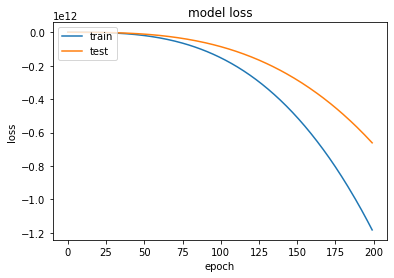

In [11]:
print("training Deep Neural Network now ...")

dnn_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(700,)),
    keras.layers.Dense(500, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("current time:-", datetime.datetime.now())
history = dnn_model.fit(pComponents, trainY, validation_split=0.25, epochs=200, batch_size=5)

# list all data in history
print(history.history.keys())

#test_loss, test_acc = dnn_model.evaluate(X_test, y_test)
#print('Accuracy of Deep Neural Network is: %f ' % test_acc)
print("current time:-", datetime.datetime.now())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()